<a href="https://colab.research.google.com/github/JcaHernandez99/Ploxpot/blob/main/Relaci%C3%B3n_Minutos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd

In [3]:
from google.colab import files

# Cargar el archivo de Excel desde tu PC
uploaded = files.upload()

# Obtener el nombre del archivo cargado
file_name = list(uploaded.keys())[0]

# Leer el archivo de Excel utilizando Pandas
df = pd.read_csv(file_name)

# Mostrar las primeras filas del DataFrame
print(df.head())

Saving Credito_dias.csv to Credito_dias (1).csv
    totmou   totrev creditcd  eqpdays  Customer_ID
0   7269.0   906.58        Y      371      1082423
1  13552.0  1172.25        N       83      1069232
2   4152.0   577.39        Y      675      1031705
3   1863.0   294.26        Y      218      1089806
4   4155.0   433.16        N      222      1076695


              totmou        totrev       eqpdays   Customer_ID
count   10000.000000  10000.000000  10000.000000  1.000000e+04
mean     7692.804866   1042.133807    386.794500  1.049965e+06
std      8657.917883    857.144895    252.720196  2.879424e+04
min         0.000000     11.100000     -5.000000  1.000014e+06
25%      2576.000000    526.787500    210.000000  1.025053e+06
50%      5262.000000    820.235000    338.000000  1.049652e+06
75%      9823.250000   1272.975000    522.000000  1.074798e+06
max    163264.176700  13426.600000   1823.000000  1.099992e+06
totmou           0
totrev           0
creditcd       152
eqpdays          0
Customer_ID      0
dtype: int64


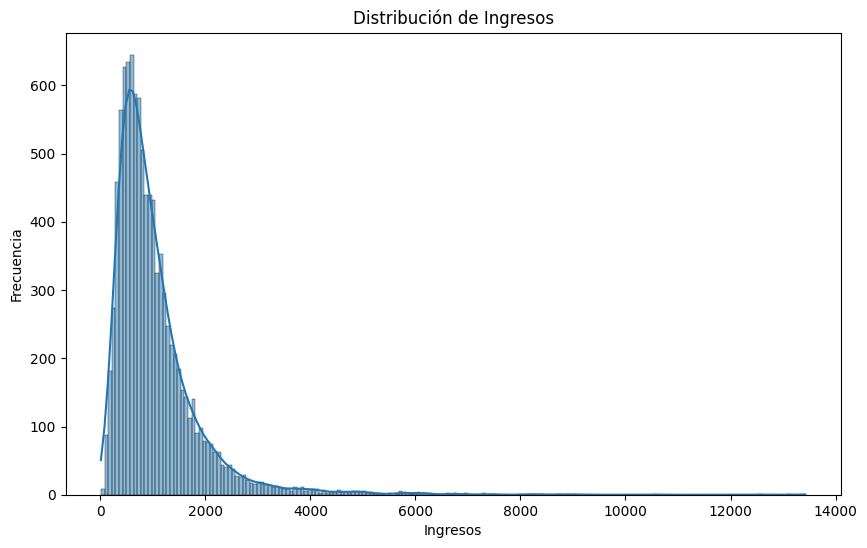

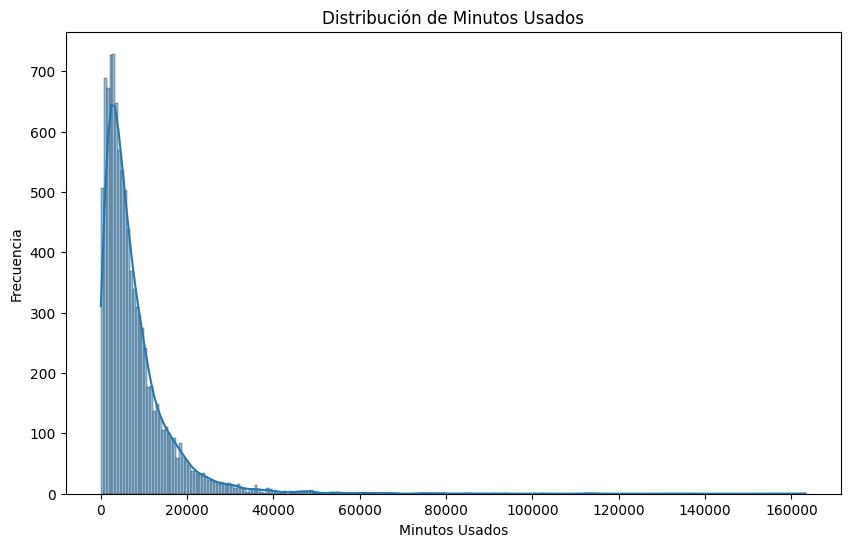

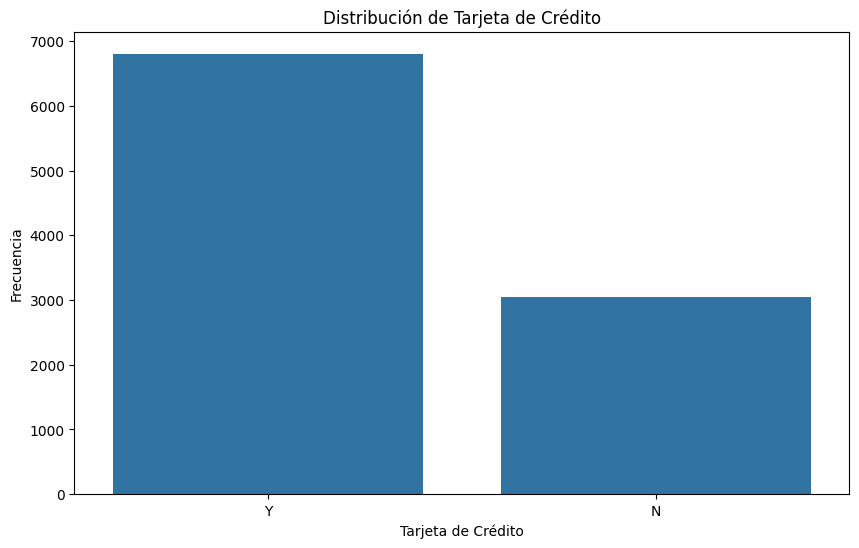

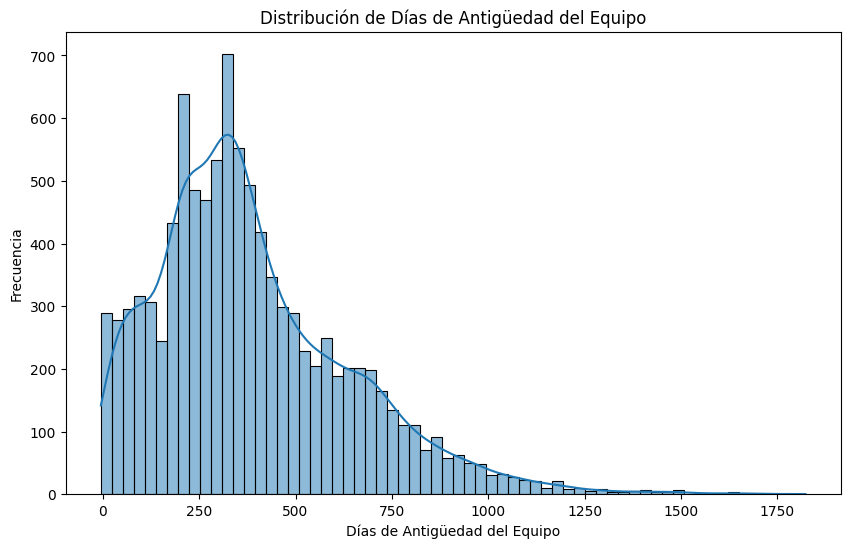

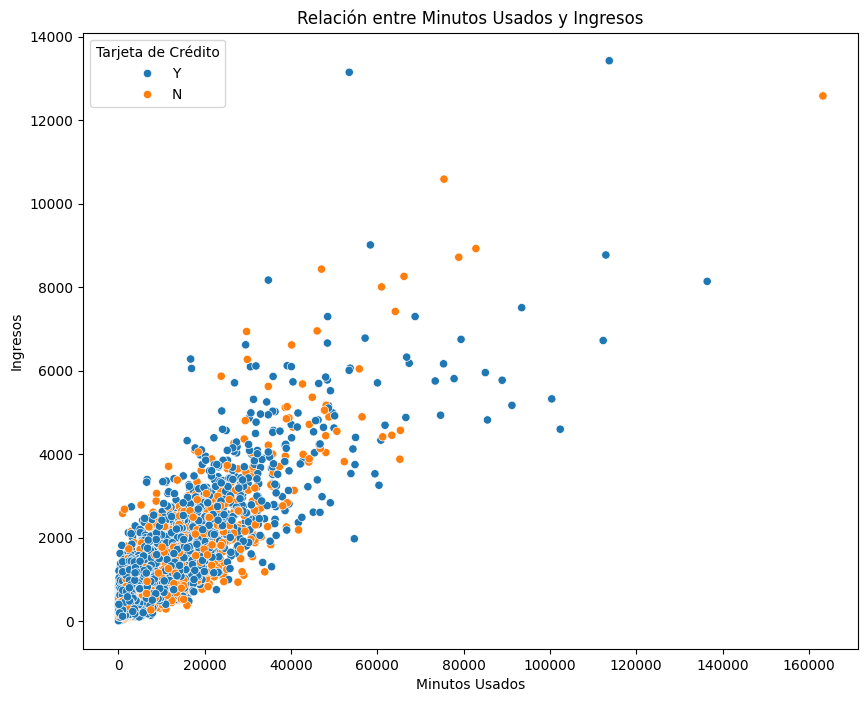

Existen una relación positiva entre el total de minutos usados con la compañía y el ingreso total de los clientes.
La presencia de tarjeta de crédito no parece afectar significativamente esta relación.


In [4]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar base de datos
#df = pd.read_csv('Credito_dias.csv')

# Descripción de las variables
print(df.describe())

# Tratamiento de valores nulos (si aplica)
print(df.isnull().sum())

# Exploratorio separado por cada variable
plt.figure(figsize=(10, 6))
sns.histplot(df['totrev'], kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['totmou'], kde=True)
plt.title('Distribución de Minutos Usados')
plt.xlabel('Minutos Usados')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='creditcd', data=df)
plt.title('Distribución de Tarjeta de Crédito')
plt.xlabel('Tarjeta de Crédito')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['eqpdays'], kde=True)
plt.title('Distribución de Días de Antigüedad del Equipo')
plt.xlabel('Días de Antigüedad del Equipo')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de dispersión entre totrev y totmou
plt.figure(figsize=(10, 8))
sns.scatterplot(x='totmou', y='totrev', hue='creditcd', data=df)
plt.title('Relación entre Minutos Usados y Ingresos')
plt.xlabel('Minutos Usados')
plt.ylabel('Ingresos')
plt.legend(title='Tarjeta de Crédito')
plt.show()

# Conclusión
print("Existen una relación positiva entre el total de minutos usados con la compañía y el ingreso total de los clientes.")
print("La presencia de tarjeta de crédito no parece afectar significativamente esta relación.")

In [5]:
df.describe(include = ['object','number'])

,totmou,totrev,creditcd,eqpdays,Customer_ID
count,10000.000000,10000.000000,9848,10000.000000,1.000000e+04
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,6796,NaN,NaN
mean,7692.804866,1042.133807,NaN,386.794500,1.049965e+06
std,8657.917883,857.144895,NaN,252.720196,2.879424e+04
min,0.000000,11.100000,NaN,-5.000000,1.000014e+06
25%,2576.000000,526.787500,NaN,210.000000,1.025053e+06
50%,5262.000000,820.235000,NaN,338.000000,1.049652e+06
75%,9823.250000,1272.975000,NaN,522.000000,1.074798e+06


Los nulos pueden ser riesgosos
regresionlineal unibvariada, no inlfuye tanto los nullos
Los nuulos se pueden dejar si la muestra es muy pequeña

In [6]:
df[df['creditcd'].isnull()]

,totmou,totrev,creditcd,eqpdays,Customer_ID
44,5684.0,857.65,NaN,244,1072218
47,925.0,373.12,NaN,344,1066597
127,14466.0,2243.76,NaN,387,1023352
253,2504.0,756.79,NaN,495,1045521
427,76260.0,5526.11,NaN,361,1001813
...,...,...,...,...,...
9428,15591.0,1330.71,NaN,447,1050795
9561,3011.0,522.14,NaN,74,1096985
9634,853.0,650.34,NaN,780,1025203
9783,33660.0,4247.85,NaN,206,1099258


<ipython-input-7-1895dc735a25>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='totrev', y='creditcd', inner='box', palette='Dark2')


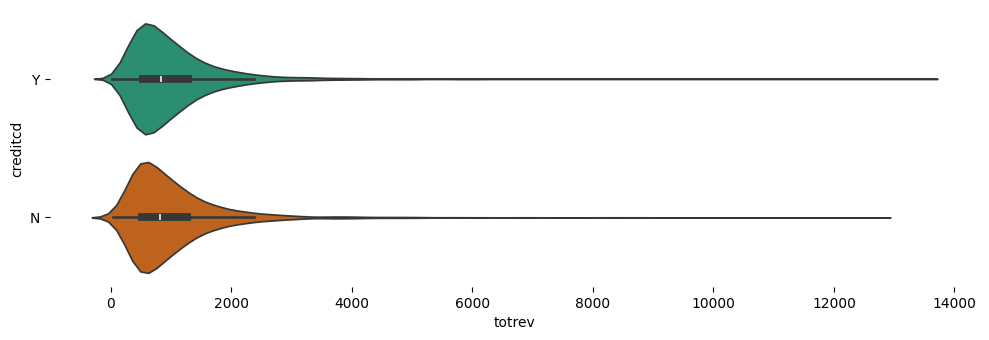

In [7]:
# @title creditcd vs totrev

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['creditcd'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='totrev', y='creditcd', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

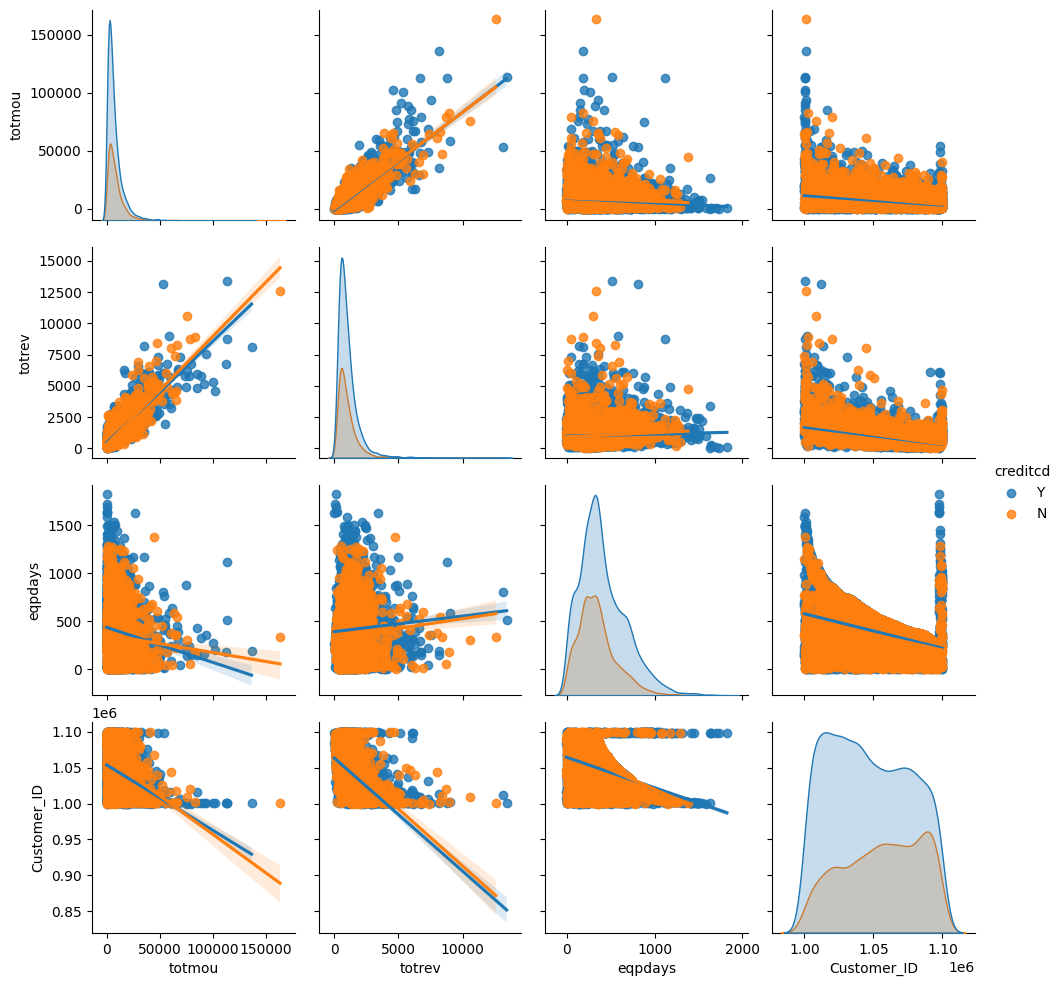

In [8]:
sns.pairplot(data=df,hue ='creditcd', kind = 'reg')

In [9]:
corr = df[['totmou','totrev','eqpdays']].corr()

In [10]:
corr

,totmou,totrev,eqpdays
totmou,1.000000,0.835485,-0.110179
totrev,0.835485,1.000000,0.061617
eqpdays,-0.110179,0.061617,1.000000


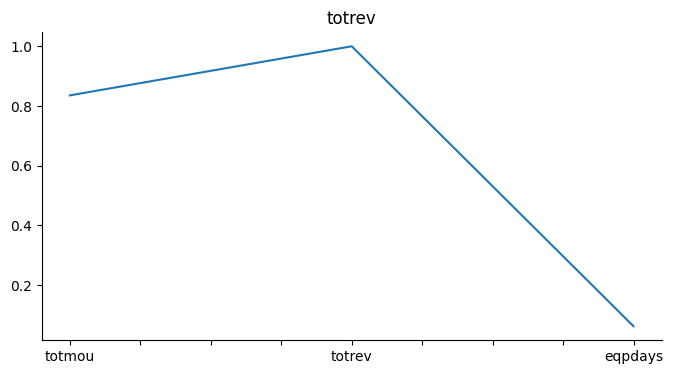

In [11]:
# @title totrev

from matplotlib import pyplot as plt
corr['totrev'].plot(kind='line', figsize=(8, 4), title='totrev')
plt.gca().spines[['top', 'right']].set_visible(False)

In [12]:
df_aux = df.dropna()
df_aux = df_aux[df_aux['eqpdays']>0]
df_aux

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695
...,...,...,...,...,...
9995,2570.0,484.31,Y,611,1027614
9996,2105.0,583.36,Y,1243,1098422
9997,3690.0,294.29,Y,212,1096497
9998,3333.0,233.08,Y,290,1087248


In [13]:
df_aux.shape

(9826, 5)

In [14]:
from sklearn.linear_model import LinearRegression

# Suponiendo que df contiene tus datos, incluyendo las columnas para x y y
#df= pd.read_csv(url)

# Definir las características (x) y la variable de destino (y)
x = df[['totmou']]  # Reemplaza 'columna_x' con el nombre de la columna que contiene las características
y = df['totrev']    # Reemplaza 'columna_y' con el nombre de la columna que contiene la variable de destino

# Crear una instancia del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a tus datos
model.fit(x, y)

# Imprimir los coeficientes obtenidos para cada característica
print("Coeficientes:", model.coef_)

# Imprimir el intercepto del modelo
print("Intercepto:", model.intercept_)


Coeficientes: [0.08271404]
Intercepto: 405.8308490051819


In [15]:
# Supongamos que tienes nuevas observaciones que quieres predecir
nuevos_datos = [[10], [20], [30]]  # Por ejemplo, supongamos que son los valores de totmou para predecir

# Hacer predicciones usando el modelo ajustado
predicciones = model.predict(nuevos_datos)

# Imprimir las predicciones
print("Predicciones:", predicciones)


Predicciones: [406.65798939 407.48512978 408.31227016]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
import numpy as np

# Suponiendo que 'a' es el valor de 'totmou' para el cual quieres hacer una predicción
a = 1231123123

# Hacer la predicción utilizando el modelo ajustado
prediccion_a = model.predict(np.array(a).reshape(-1, 1))

# Imprimir la predicción
print("Predicción para 'totmou' de", a, "es:", prediccion_a)


Predicción para 'totmou' de 1231123123 es: [1.01831571e+08]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: xlabel='totmou', ylabel='totrev'>

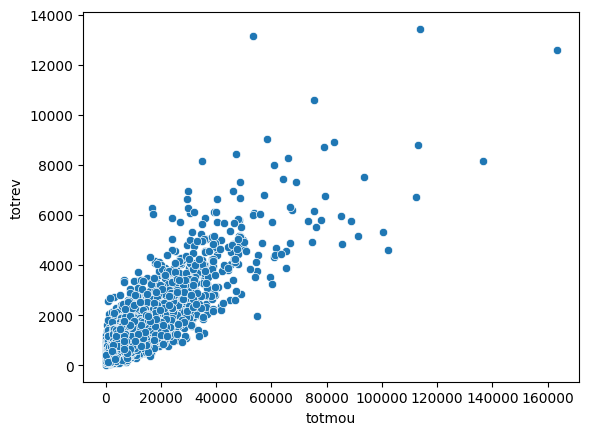

In [17]:
sns.scatterplot(data = df, x='totmou', y ='totrev')